In [1]:
import matplotlib.pyplot as plt
from matplotlib import colormaps
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA

In [2]:
europe = [
    "Albania", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria",
    "Croatia", "Cyprus", "Czechia", "Denmark", "Estonia", "Finland", "France", 
    "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Kosovo", 
    "Latvia", "Lithuania", "Luxembourg", "Malta", "Moldova", "Montenegro", 
    "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", 
    "Russia", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", 
    "Ukraine", "United Kingdom"
]

In [3]:
poverty_data = pd.read_csv("../data/poverty-share-on-less-than-30-per-day.csv")
poverty_data.columns = ["Entity", "Code", "Year", "Percentage"]

In [4]:
df = poverty_data.copy()
#df = df[df["Entity"].isin(europe)]
df = df.pivot(index="Entity", columns="Year", values="Percentage")
df = df.dropna()

df.head()

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,,
Albania,99.91247,99.91247,99.91247,99.91247,99.91247,99.91247,99.91247,99.91247,99.91247,99.91247,...,99.29574,99.45531,99.61830,99.38994,99.12649,99.17554,99.09021,99.21775,99.06956,98.89066
Algeria,98.52563,98.56719,98.45884,98.38420,98.26176,98.41276,98.70965,99.02948,98.83532,99.03297,...,99.44170,99.39339,99.31054,99.21223,99.12907,99.06030,99.01225,99.02287,98.99197,98.98599
Angola,98.31424,98.46804,98.45545,98.31506,98.31506,98.31642,98.31506,98.26270,98.38377,98.71879,...,99.69198,99.68358,99.62342,99.61710,99.59765,99.60445,99.61757,99.63395,99.65298,99.67712
Argentina (Urban),78.97609,78.97971,76.86285,75.87503,77.83440,75.18248,79.04477,82.30139,86.28103,88.68702,...,82.84190,80.76276,80.77766,80.79851,82.85709,81.55458,81.72228,79.83612,83.75245,84.24470
Armenia,96.68831,96.49645,96.45458,96.21356,95.97418,96.04661,96.51135,96.86482,95.94214,96.60004,...,99.66200,99.59022,99.31822,99.60308,98.96194,98.59429,99.49424,98.79664,98.26598,99.53208


In [5]:
df_std = df.copy()
for col in df:
    c = df[[col]]
    mean = c.mean()
    std = c.std()
    
    c = (c - mean) / std
    df_std[[col]] = c
    
df_std.head()

Year,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Entity,,,,,,,,,,,,,,,,,,,,,
Albania,0.505614,0.504546,0.501904,0.507192,0.509204,0.516187,0.521572,0.523305,0.522645,0.515924,...,0.581753,0.594265,0.605876,0.606754,0.603941,0.611067,0.613770,0.627375,0.633426,0.634650
Algeria,0.426030,0.427774,0.419846,0.422397,0.419995,0.437488,0.460181,0.479094,0.470028,0.473627,...,0.587221,0.591929,0.594199,0.600024,0.604037,0.606807,0.610946,0.620420,0.630698,0.637970
Angola,0.413899,0.422116,0.419655,0.418561,0.422875,0.432432,0.440042,0.440703,0.447971,0.458517,...,0.596598,0.602876,0.606070,0.615357,0.621519,0.626922,0.632870,0.642229,0.653941,0.662035
Argentina (Urban),-0.695820,-0.690034,-0.799252,-0.826509,-0.683960,-0.781546,-0.543496,-0.358462,-0.143229,-0.023930,...,-0.034719,-0.110895,-0.109005,-0.097344,-0.003046,-0.040325,-0.015274,-0.064334,0.094821,0.124668
Armenia,0.320595,0.309602,0.306705,0.301960,0.296367,0.313321,0.347982,0.370712,0.328701,0.356622,...,0.595475,0.599355,0.594490,0.614826,0.597802,0.589580,0.628403,0.612346,0.605169,0.656985


Text(0.5, 0.98, 'PCA with 2 components')

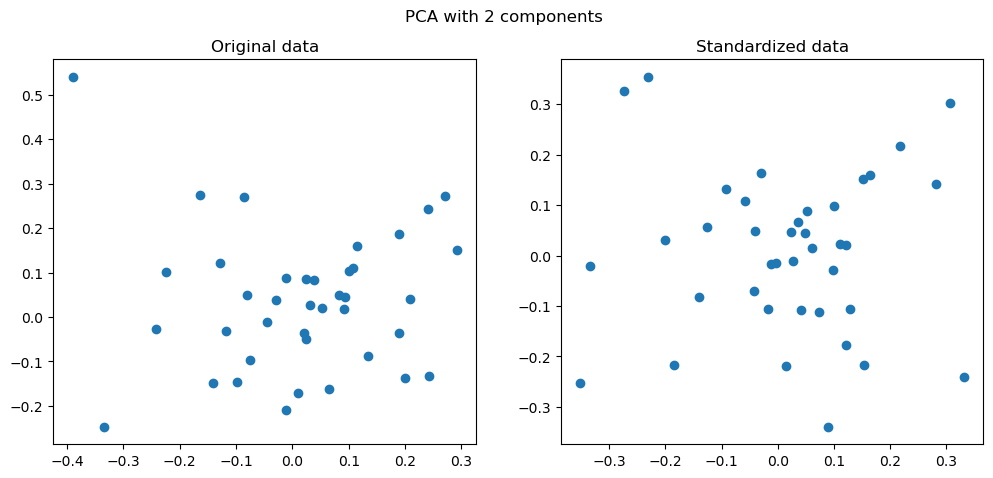

In [11]:
pca = PCA(n_components=df.shape[1])
dfs = [df, df_std]
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

for i, dataframe in enumerate(dfs):

    res = pca.fit(dataframe)

    loadings = pd.DataFrame(
        res.components_.T,
        columns=["PC%s" % _ for _ in range(len(res.components_))],
        index=df.columns,
    )

    #ax[i].plot(pca.explained_variance_ratio_)
    ax[i].scatter(res.components_[:, 0], res.components_[:, 1])
    
ax[0].set_title("Original data")
ax[1].set_title("Standardized data")
plt.suptitle("PCA with 2 components")

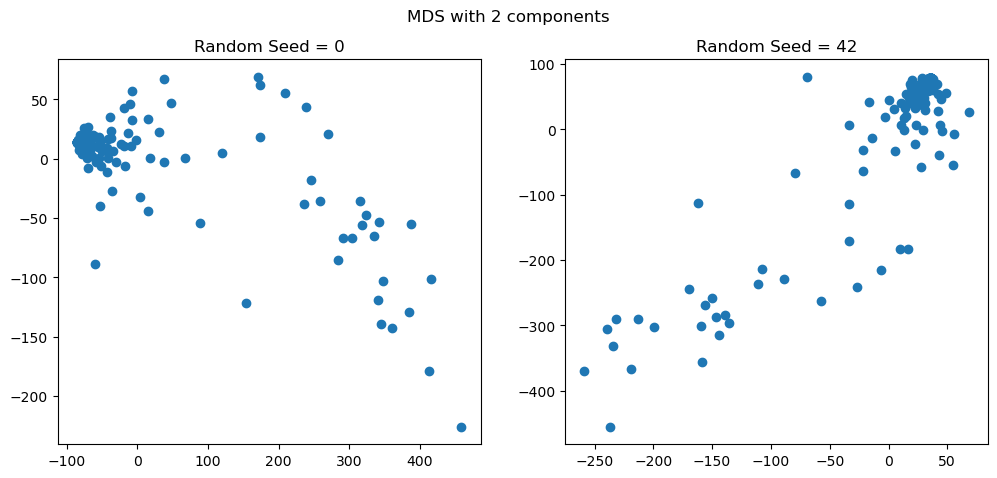

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

random_states = [0, 42]

for i, seed in enumerate(random_states):

    mds = MDS(n_components=2, random_state=seed)
    X = mds.fit_transform(df)
    x, y = X[:, 0], X[:, 1]
    ax[i].scatter(x, y)

    ax[i].set_title(f"Random Seed = {seed}")

fig.suptitle("MDS with 2 components")
plt.show()

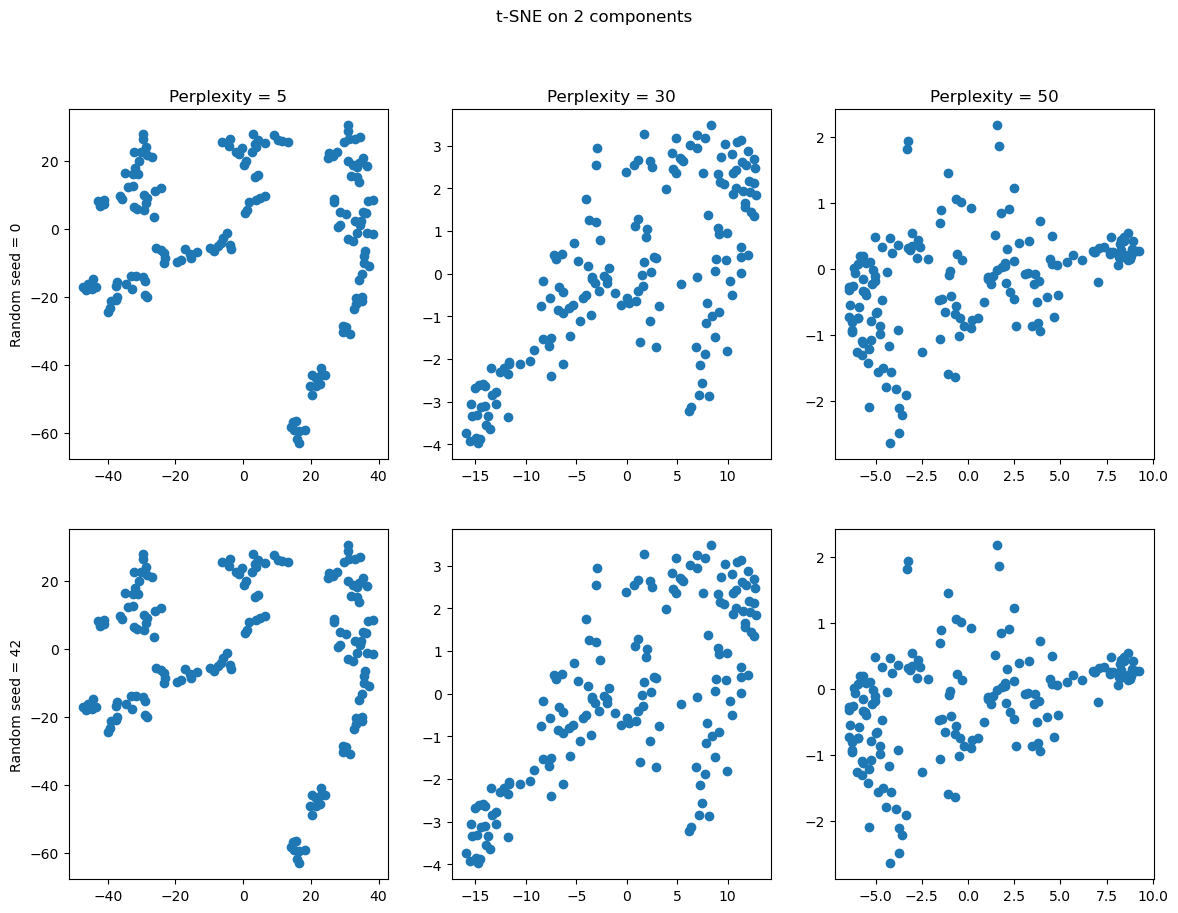

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(14, 10))
perplex = [5, 30, 50]
random_states = [0, 42]

for i, seed in enumerate(random_states):
    for j, p in enumerate(perplex):
        tsne = TSNE(n_components=2, perplexity=p, random_state=seed)
        X = tsne.fit_transform(df)
        x, y = X[:, 0], X[:, 1]
        
        ax[i, j].scatter(x, y)
        
        if i == 0:
            ax[i, j].set_title(f"Perplexity = {p}")
        if j == 0:
            ax[i, j].set_ylabel(f"Random seed = {seed}")
            
plt.suptitle("t-SNE on 2 components")
plt.show()